In [1]:
# !pip install nltk

In [2]:
# !pip install wordcloud

In [3]:
import nltk

In [4]:
# nltk.download()

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [147]:
pwd

'C:\\Users\\Administrator\\Desktop\\Python\\NLP\\Day 1'

In [5]:
reviews = pd.read_excel("K8 Reviews v0.2.xlsx")

In [6]:
reviews.head()

,sentiment,review
0,1,Good but need updates and improvements
1,0,"Worst mobile i have bought ever, Battery is dr..."
2,1,when I will get my 10% cash back.... its alrea...
3,1,Good
4,0,The worst phone everThey have changed the last...


In [7]:
reviews['review'] = reviews['review'].astype(str)

This dataset is scrapped from amazon about Lenevo K8 mobile phones.While the users gave the reviews, they also give the ratings
- Ratings 1,2,3 -> negitive sentiment has a value 0 in the sentiment column
- Ratings 4,5 -> positive sentiment has a value 1 in the sentiment column

In [8]:
reviews.shape

(14675, 2)

In [9]:
reviews.sentiment.value_counts()

0    7712
1    6963
Name: sentiment, dtype: int64

Plot the word cloud and the bar graph for the reviews

In [17]:
from wordcloud import WordCloud

In [18]:
reviews_combined = " ".join(reviews.review.values)

In [19]:
str = ["hi","hello","how are you"]
" ".join(str)

'hi hello how are you'

In [20]:
reviews_combined[:100]

'Good but need updates and improvements Worst mobile i have bought ever, Battery is draining like hel'

In [21]:
word_cloud = WordCloud().generate(reviews_combined)

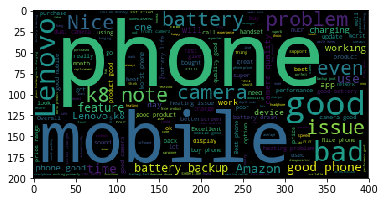

In [22]:
plt.figure()
plt.imshow(word_cloud)
plt.show()

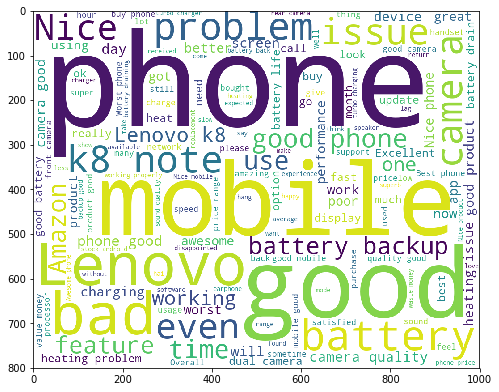

In [23]:
word_cloud = WordCloud(width=1000,height=800,background_color='white',
                       max_words=150).\
generate_from_text(reviews_combined)
plt.figure(figsize=[8,8])
plt.imshow(word_cloud)
plt.show()

In [24]:
all_terms = []
fdist = {}
all_terms = reviews_combined.split(" ")
for word in all_terms:
    fdist[word] = fdist.get(word,0) + 1

In [25]:
freq = {"words":list(fdist.keys()),"freq":list(fdist.values())}
df_dist = pd.DataFrame(freq)

In [26]:
df_dist.sort_values(ascending=False,by="freq").head(25)

,words,freq
13,is,10151
94,the,5565
41,not,5162
4,and,5078
91,phone,4766
20,to,4627
75,this,3833
143,in,3445
28,I,3418
185,good,3348


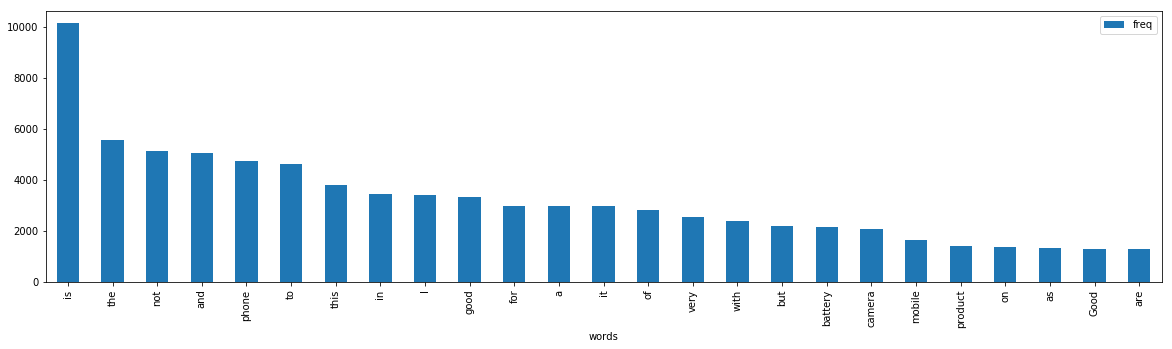

In [28]:
%matplotlib inline
df_dist.sort_values(ascending=False, by="freq").head(25).\
plot.bar(x= "words", y= "freq",figsize=(20,5)) 

Problems with the above visuals:
    1.case is non uniform
    2. punctuations and stop words
    3. words with different tense forms like charged, charging, charges has its root form in charge

In [29]:
from nltk.tokenize import word_tokenize

In [30]:
all_terms = word_tokenize(reviews_combined.lower())

In [31]:
print(all_terms[:20])

['good', 'but', 'need', 'updates', 'and', 'improvements', 'worst', 'mobile', 'i', 'have', 'bought', 'ever', ',', 'battery', 'is', 'draining', 'like', 'hell', ',', 'backup']


In [32]:
from nltk.probability import FreqDist

In [33]:
fdist = FreqDist(all_terms)
fdist

FreqDist({'.': 13529, 'is': 10386, ',': 6890, 'phone': 6565, 'the': 6526, 'not': 6030, 'good': 5717, 'and': 5413, 'it': 5361, 'to': 4697, ...})

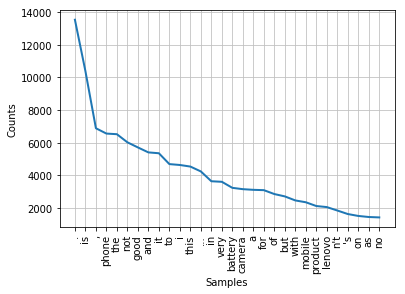

In [34]:
fdist.plot(30,cumulative=False)
plt.show()

The most commonly used and the least commonly used words in any language includes:
    1. language connectors called stop words
    2. punctuations

In [35]:
from string import punctuation
from nltk.corpus import stopwords

In [36]:
stop_nltk = stopwords.words("english")

In [37]:
stop_updated = stop_nltk + ["...","..","!!"] +["phone",
                                          "mobile","lenovo","k8",
                                               "note","amazon","n't"]

In [38]:
reviews_updated1 = [term for term in all_terms \
                    if term not in stop_updated \
and term not in list(punctuation) and len(term)>2]

In [39]:
print(list(punctuation))

['!', '"', '#', '$', '%', '&', "'", '(', ')', '*', '+', ',', '-', '.', '/', ':', ';', '<', '=', '>', '?', '@', '[', '\\', ']', '^', '_', '`', '{', '|', '}', '~']


In [40]:
print(reviews_updated1)

['good', 'need', 'updates', 'improvements', 'worst', 'bought', 'ever', 'battery', 'draining', 'like', 'hell', 'backup', 'hours', 'internet', 'uses', 'even', 'put', 'idle', 'getting', 'discharged.this', 'biggest', 'lie', 'lenove', 'expected', 'making', 'full', 'saying', 'battery', '4000mah', 'booster', 'charger', 'fake', 'takes', 'least', 'hours', 'fully', 'charged.do', 'know', 'survive', 'making', 'full', 'us.please', 'else', 'regret', 'like', 'get', 'cash', 'back', 'already', 'january..', 'good', 'worst', 'everthey', 'changed', 'last', 'problem', 'still', 'returning', '.highly', 'disappointing', 'telling', 'buyi', 'totally', 'disappointedpoor', 'batterypoor', 'camerawaste', 'money', 'awesome', 'charging', 'heats', 'allot..really', 'genuine', 'reason', 'hate', 'battery', 'level', 'worn', 'hitting', 'problems', 'hanging', 'problems', 'service', 'station', 'ahmedabad', 'one', 'years', 'warranty', 'change', 'lot', 'glitches', 'dont', 'buy', 'thing', 'better', 'options', 'wrost', 'good', '

In [41]:
from nltk.stem import SnowballStemmer
stemmer_s = SnowballStemmer("english")

In [42]:
reviews_updated_stem = [ stemmer_s.stem(word) for word in reviews_updated1]

In [43]:
from nltk.stem import WordNetLemmatizer
lemm = WordNetLemmatizer()

In [44]:
reviews_updated_lemm = [ lemm.lemmatize(word) for word in reviews_updated1]

In [45]:
print(len(set(reviews_updated_stem)),len(set(reviews_updated_lemm)))

16230 17970


Conslusion:
    1.stemmer helps to reduce the number of dictinct words in the corpus
    2. lemmetizer helps to retain the meaning of the words effectively used when the context of the word is important
    3. stemmer is used when i have an intent of getting lesser words which inturn reduces the total number of features

In [46]:
# combine all the steps and create a udf
# takes one review as input and returns a cleaned review as a string
def  clean_txt(sent):
    tokens = word_tokenize(sent.lower())
    stemmed = [stemmer_s.stem(term) for term in tokens 
               if term not in stop_updated and
               term not in list(punctuation) and len(term) > 2] 
    res = " ".join(stemmed)
    return res

In [47]:
reviews['clean_review'] = reviews.review.apply(clean_txt)

In [48]:
reviews.head()

,sentiment,review,clean_review
0,1,Good but need updates and improvements,good need updat improv
1,0,"Worst mobile i have bought ever, Battery is dr...",worst bought ever batteri drain like hell back...
2,1,when I will get my 10% cash back.... its alrea...,get cash back alreadi january..
3,1,Good,good
4,0,The worst phone everThey have changed the last...,worst everthey chang last problem still return...


# Word cloud on cleaned dataset


In [49]:
reviews_combined = " ".join(reviews.clean_review.values)

In [50]:
word_cloud = WordCloud(width=800,height=800,background_color='white',max_words=150).\
generate_from_text(reviews_combined)

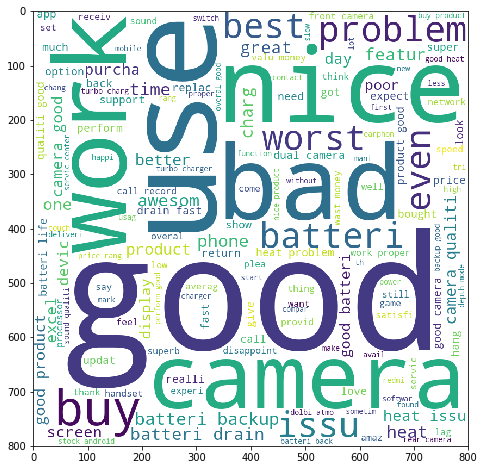

In [51]:
plt.figure(figsize=[8,8])
plt.imshow(word_cloud)
plt.show()

# Bar Graph on top 25 words

In [52]:
all_terms = []
fdist = {}
all_terms = reviews_combined.split(" ")
for word in all_terms:
    fdist[word] = fdist.get(word,0) + 1

In [53]:
freq = {"words":list(fdist.keys()),"freq":list(fdist.values())}
df_dist = pd.DataFrame(freq)

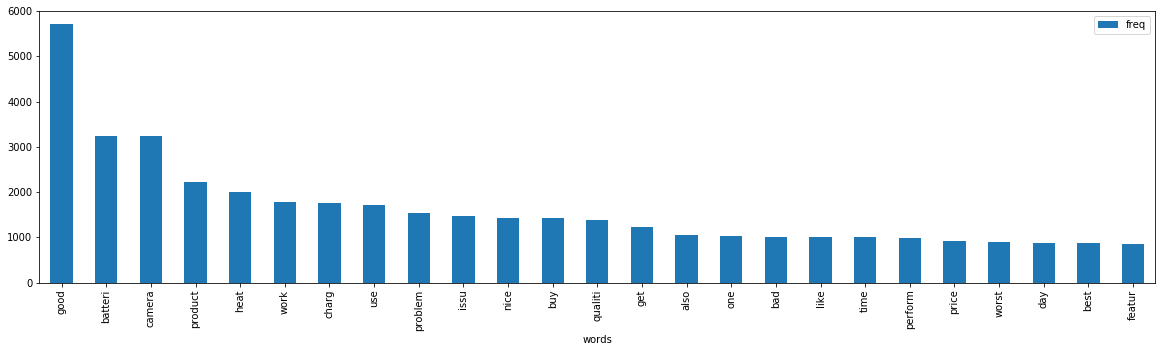

In [54]:
%matplotlib inline
df_dist.sort_values(ascending=False, by="freq").head(25).\
plot.bar(x= "words", y= "freq",figsize=(20,5)) 

# Sentimental analysis 

In [55]:
reviews.head(2)

,sentiment,review,clean_review
0,1,Good but need updates and improvements,good need updat improv
1,0,"Worst mobile i have bought ever, Battery is dr...",worst bought ever batteri drain like hell back...


In [56]:
affin = pd.read_csv( 'C:\\Users\\Administrator\\Desktop\\Python\\NLP\\Day 3\\AFINN-111.txt' , sep = '\t'  , header = None ) # AFINN-111

term_score = dict( affin.values )

In [57]:
from nltk.stem import WordNetLemmatizer
lemm = WordNetLemmatizer()

In [58]:
def get_sentiment( txt ):
#     d = {}
    score = 0 
    tokens = word_tokenize( txt.lower() )
    for terms in tokens:
        score += term_score.get( terms , 0 )
#         d[terms]. = term_score.get( terms , 0 )
    return score

def  clean_txt_wo_stem(sent):
    tokens = word_tokenize(sent.lower())
    stemmed = [ term for term in tokens 
               if term not in stop_updated and
               term not in list(punctuation) and len(term) > 2] 
    res = " ".join(stemmed)
    return res

def  clean_txt_lem(sent):
    tokens = word_tokenize(sent.lower())
    stemmed = [ lemm.lemmatize( term ) for term in tokens 
               if term not in stop_updated and
               term not in list(punctuation) and len(term) > 2] 
    res = " ".join(stemmed)
    return res

In [59]:
reviews['clean_review_lemm'] = reviews['review'].map( clean_txt_lem )

In [60]:
reviews['clean_review_wo_stem'] = reviews['review'].map( clean_txt_wo_stem )

In [61]:
reviews['sent_score'] = reviews['clean_review'].map( get_sentiment )
reviews['sent_score_wo_stem'] = reviews['clean_review_wo_stem'].map( get_sentiment )

In [62]:
reviews['sent_score_lemm'] = reviews['clean_review_lemm'].map( get_sentiment )

In [63]:
reviews.head()

,sentiment,review,clean_review,clean_review_lemm,clean_review_wo_stem,sent_score,sent_score_wo_stem,sent_score_lemm
0,1,Good but need updates and improvements,good need updat improv,good need update improvement,good need updates improvements,3,3,5
1,0,"Worst mobile i have bought ever, Battery is dr...",worst bought ever batteri drain like hell back...,worst bought ever battery draining like hell b...,worst bought ever battery draining like hell b...,-8,-8,-8
2,1,when I will get my 10% cash back.... its alrea...,get cash back alreadi january..,get cash back already january..,get cash back already january..,0,0,0
3,1,Good,good,good,good,3,3,3
4,0,The worst phone everThey have changed the last...,worst everthey chang last problem still return...,worst everthey changed last problem still retu...,worst everthey changed last problem still retu...,-7,-7,-7


In [64]:
term_score.get( 'improvement' , 'NA')

2

In [65]:
reviews['sent_prediction'] = reviews['sent_score'].apply( lambda x : 1 if x > 0 else 0 )
reviews['sent_prediction_wo_stem'] = reviews['sent_score_wo_stem'].apply( lambda x : 1 if x > 0 else 0 )
reviews['sent_prediction_lemm'] = reviews['sent_score_lemm'].apply( lambda x : 1 if x > 0 else 0 )

In [66]:
reviews.head()

,sentiment,review,clean_review,clean_review_lemm,clean_review_wo_stem,sent_score,sent_score_wo_stem,sent_score_lemm,sent_prediction,sent_prediction_wo_stem,sent_prediction_lemm
0,1,Good but need updates and improvements,good need updat improv,good need update improvement,good need updates improvements,3,3,5,1,1,1
1,0,"Worst mobile i have bought ever, Battery is dr...",worst bought ever batteri drain like hell back...,worst bought ever battery draining like hell b...,worst bought ever battery draining like hell b...,-8,-8,-8,0,0,0
2,1,when I will get my 10% cash back.... its alrea...,get cash back alreadi january..,get cash back already january..,get cash back already january..,0,0,0,0,0,0
3,1,Good,good,good,good,3,3,3,1,1,1
4,0,The worst phone everThey have changed the last...,worst everthey chang last problem still return...,worst everthey changed last problem still retu...,worst everthey changed last problem still retu...,-7,-7,-7,0,0,0


In [67]:
pd.crosstab( reviews['sentiment'] , reviews['sent_prediction'] )  # many missclassification 

sent_prediction,0,1
sentiment,,
0,5150,2562
1,1667,5296


In [68]:
from sklearn.metrics import accuracy_score
accuracy_score( reviews['sentiment'] , reviews['sent_prediction'] )  # percentage mismatch

0.7118228279386712

In [69]:
pd.crosstab( reviews['sentiment'] , reviews['sent_prediction_wo_stem'] )  # many missclassification 

sent_prediction_wo_stem,0,1
sentiment,,
0,4966,2746
1,970,5993


In [70]:
accuracy_score( reviews['sentiment'] , reviews['sent_prediction_wo_stem'] ) # still bad because plurals and bigrams are not handled

0.7467802385008517

In [71]:
pd.crosstab( reviews['sentiment'] , reviews['sent_prediction_lemm'] )  # many missclassification 

sent_prediction_lemm,0,1
sentiment,,
0,4960,2752
1,971,5992


In [72]:
accuracy_score( reviews['sentiment'] , reviews['sent_prediction_lemm'] ) # still bad because plurals and bigrams are not handled

0.7463032367972743

In [73]:
reviews.head(10)

,sentiment,review,clean_review,clean_review_lemm,clean_review_wo_stem,sent_score,sent_score_wo_stem,sent_score_lemm,sent_prediction,sent_prediction_wo_stem,sent_prediction_lemm
0,1,Good but need updates and improvements,good need updat improv,good need update improvement,good need updates improvements,3,3,5,1,1,1
1,0,"Worst mobile i have bought ever, Battery is dr...",worst bought ever batteri drain like hell back...,worst bought ever battery draining like hell b...,worst bought ever battery draining like hell b...,-8,-8,-8,0,0,0
2,1,when I will get my 10% cash back.... its alrea...,get cash back alreadi january..,get cash back already january..,get cash back already january..,0,0,0,0,0,0
3,1,Good,good,good,good,3,3,3,1,1,1
4,0,The worst phone everThey have changed the last...,worst everthey chang last problem still return...,worst everthey changed last problem still retu...,worst everthey changed last problem still retu...,-7,-7,-7,0,0,0
5,0,Only I'm telling don't buyI'm totally disappoi...,tell buyi total disappointedpoor batterypoor c...,telling buyi totally disappointedpoor batteryp...,telling buyi totally disappointedpoor batteryp...,0,0,0,0,0,0
6,1,"Phone is awesome. But while charging, it heats...",awesom charg heat allot..r genuin reason hate,awesome charging heat allot..really genuine re...,awesome charging heats allot..really genuine r...,-3,1,1,0,1,1
7,0,The battery level has worn down,batteri level worn,battery level worn,battery level worn,-1,-1,-1,0,0,0
8,0,It's over hitting problems...and phone hanging...,hit problem hang problem servic station ahmeda...,hitting problem hanging problem service statio...,hitting problems hanging problems service stat...,-4,-4,-4,0,0,0
9,0,A lot of glitches dont buy this thing better g...,lot glitch dont buy thing better option,lot glitch dont buy thing better option,lot glitches dont buy thing better options,2,2,2,1,1,1


# Vader method

In [74]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer # SentimentIntensityAnalyzer


In [75]:
analyser = SentimentIntensityAnalyzer()

def get_vander_sentiment(sent) : 
    return analyser.polarity_scores(sent)['compound']

In [76]:
reviews.head(2)

,sentiment,review,clean_review,clean_review_lemm,clean_review_wo_stem,sent_score,sent_score_wo_stem,sent_score_lemm,sent_prediction,sent_prediction_wo_stem,sent_prediction_lemm
0,1,Good but need updates and improvements,good need updat improv,good need update improvement,good need updates improvements,3,3,5,1,1,1
1,0,"Worst mobile i have bought ever, Battery is dr...",worst bought ever batteri drain like hell back...,worst bought ever battery draining like hell b...,worst bought ever battery draining like hell b...,-8,-8,-8,0,0,0


In [77]:
reviews['vader_score'] = reviews['review'].map( get_vander_sentiment )
reviews['vader_score_sent'] = reviews['vader_score'].apply( lambda x : 1 if x > 0 else 0 )

In [78]:
reviews.head(2)

,sentiment,review,clean_review,clean_review_lemm,clean_review_wo_stem,sent_score,sent_score_wo_stem,sent_score_lemm,sent_prediction,sent_prediction_wo_stem,sent_prediction_lemm,vader_score,vader_score_sent
0,1,Good but need updates and improvements,good need updat improv,good need update improvement,good need updates improvements,3,3,5,1,1,1,0.5994,1
1,0,"Worst mobile i have bought ever, Battery is dr...",worst bought ever batteri drain like hell back...,worst bought ever battery draining like hell b...,worst bought ever battery draining like hell b...,-8,-8,-8,0,0,0,-0.8720,0


In [79]:
pd.crosstab( reviews['sentiment'] , reviews['vader_score_sent'] )  # many missclassification 

vader_score_sent,0,1
sentiment,,
0,5642,2070
1,1157,5806


In [80]:
accuracy_score( reviews['sentiment'] , reviews['vader_score_sent'] ) # still bad because plurals and bigrams are not handled

0.7801022146507666

# Sentiment Prediction Strategy 3 : Building our own model 

In [81]:
reviews.head(1)

,sentiment,review,clean_review,clean_review_lemm,clean_review_wo_stem,sent_score,sent_score_wo_stem,sent_score_lemm,sent_prediction,sent_prediction_wo_stem,sent_prediction_lemm,vader_score,vader_score_sent
0,1,Good but need updates and improvements,good need updat improv,good need update improvement,good need updates improvements,3,3,5,1,1,1,0.5994,1


In [82]:
x = reviews.clean_review
y = reviews.sentiment

In [83]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()

In [84]:
from sklearn.model_selection import train_test_split

x_train , x_test , y_train , y_test = train_test_split( x , y , test_size = 0.3 , random_state = 42  )

In [85]:
x_train_bow = count_vect.fit_transform( x_train )
x_test_bow = count_vect.transform( x_test )

print( x_train_bow.shape , x_test_bow.shape )

(10272, 8589) (4403, 8589)


In [86]:
# model building using logistic regression


In [87]:
from sklearn.preprocessing import StandardScaler 

sc = StandardScaler()
x_sc = sc.fit_transform( x_train_bow.toarray() )
x_sc

array([[-0.02093505, -0.02093505, -0.00986719, ..., -0.00986719,
        -0.00986719, -0.01548203],
       [-0.02093505, -0.02093505, -0.00986719, ..., -0.00986719,
        -0.00986719, -0.01548203],
       [-0.02093505, -0.02093505, -0.00986719, ..., -0.00986719,
        -0.00986719, -0.01548203],
       ...,
       [-0.02093505, -0.02093505, -0.00986719, ..., -0.00986719,
        -0.00986719, -0.01548203],
       [-0.02093505, -0.02093505, -0.00986719, ..., -0.00986719,
        -0.00986719, -0.01548203],
       [-0.02093505, -0.02093505, -0.00986719, ..., -0.00986719,
        -0.00986719, -0.01548203]])

In [88]:
from sklearn.decomposition import PCA
pca = PCA( n_components = 2 )
x_pca = pca.fit_transform( x_sc )
x_pca

array([[-0.94344733, -0.2759635 ],
       [-1.11315395, -0.30970162],
       [ 0.69740398,  1.04867587],
       ...,
       [-0.73256733, -0.19081441],
       [ 0.43842719,  0.12960372],
       [-1.1041402 , -0.30375878]])

In [89]:
print( y_train.shape )
print( x_pca.shape )

(10272,)
(10272, 2)


In [90]:
x_pca[ : 5  , : ]

array([[-0.94344733, -0.2759635 ],
       [-1.11315395, -0.30970162],
       [ 0.69740398,  1.04867587],
       [-1.06643285, -0.2398269 ],
       [-1.08810612, -0.30062583]])

In [91]:
y_train.index = [ i for i in range( 0 , len(x_pca) ) ]

In [92]:
df = pd.DataFrame( x_pca )
df = pd.concat( [ df , y_train ] , axis = 1  )
df.head(2)

,0,1,sentiment
0,-0.943447,-0.275963,0
1,-1.113154,-0.309702,0


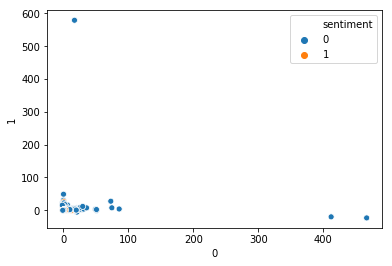

In [93]:
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns

sns.scatterplot( df[0] , df[1] , hue = df['sentiment'] )

In [94]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [95]:
logreg.fit( x_train_bow , y_train )

C:\Users\Administrator\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [96]:
y_pred = logreg.predict( x_test_bow )

In [97]:
accuracy_score( y_test , y_pred )

0.8507835566659097

In [98]:
from sklearn.ensemble import GradientBoostingClassifier

g = GradientBoostingClassifier()

g.fit( x_train_bow , y_train )

y_pred = g.predict( x_test_bow )

accuracy_score( y_test , y_pred )

0.8233022938905292

In [99]:
g.get_params()

{'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'deviance',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'presort': 'auto',
 'random_state': None,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [100]:
from sklearn.ensemble import AdaBoostClassifier

g = AdaBoostClassifier()

g.fit( x_train_bow , y_train )

y_pred = g.predict( x_test_bow )

accuracy_score( y_test , y_pred )

0.8003633885986827

In [101]:
from sklearn.ensemble import RandomForestClassifier

g = RandomForestClassifier()

g.fit( x_train_bow , y_train )

y_pred = g.predict( x_test_bow )

accuracy_score( y_test , y_pred )

C:\Users\Administrator\AppData\Roaming\Python\Python37\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.8226209402679991

In [102]:
from xgboost import XGBClassifier
# from xgboost import XGBClassifier

g = XGBClassifier()

g.fit( x_train_bow , y_train )

y_pred = g.predict( x_test_bow )

accuracy_score( y_test , y_pred )

0.8212582330229389

In [104]:
# pip install xgboost

In [105]:
from sklearn.feature_extraction.text import CountVectorizer

In [106]:
cv =  CountVectorizer( max_features = 200 )
x = cv.fit_transform ( reviews['clean_review_wo_stem']  )
x

<14675x200 sparse matrix of type '<class 'numpy.int64'>'
	with 77964 stored elements in Compressed Sparse Row format>

In [107]:
DTM1 = pd.DataFrame( x.toarray() , columns = cv.get_feature_names() )
DTM1.head(2)

,also,amazing,and,android,app,apps,atmos,available,average,awesome,...,well,within,without,work,working,works,worst,worth,would,ðÿ
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [119]:
from sklearn.cluster import KMeans

kmeans = KMeans( n_clusters = 6 , random_state = 0 )
y_means = kmeans.fit_predict( x.toarray() )

In [120]:
DTM1['cluster'] = y_means

In [121]:
DTM1.head(2)

,also,amazing,and,android,app,apps,atmos,available,average,awesome,...,within,without,work,working,works,worst,worth,would,ðÿ,cluster
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [110]:
def n_high( c_center , n ) :
    x = np.argsort( c_center , axis = 1   )
    x_sort =  x[ : ,  : : -1 ]
    c = 0
    for i in x_sort :
        print( " The n terms of the first cluster : {} ".format(c))
        c = c + 1 
        for j in i[ : n ]:
            print( BOW[j])


In [111]:
c_center  = kmeans.cluster_centers_
BOW = DTM1.columns

In [112]:
n_high( c_center , 5 )

 The n terms of the first cluster : 0 
battery
good
heating
charging
problem
 The n terms of the first cluster : 1 
good
camera
battery
quality
also
 The n terms of the first cluster : 2 
camera
battery
good
even
like
 The n terms of the first cluster : 3 
product
nice
buy
problem
working
 The n terms of the first cluster : 4 
camera
good
quality
battery
dual
 The n terms of the first cluster : 5 
good
product
price
problem
heating


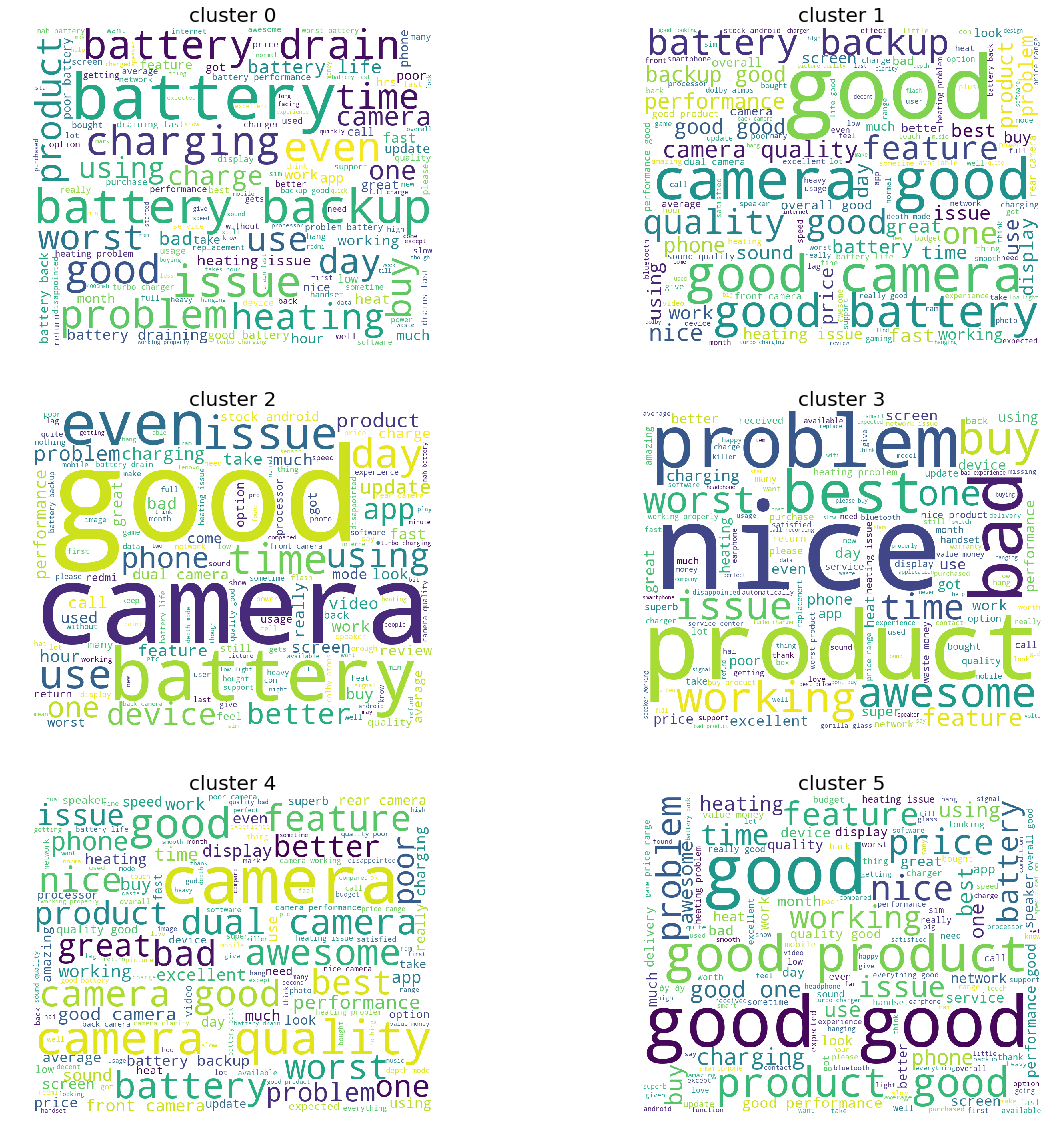

In [146]:
fig =plt.figure( figsize = (20,20))

for i in range( 0 , 6 ) :
    ax = fig.add_subplot(3,2,i+1)
    ind = DTM1.query( 'cluster== @i'  ).index
    reviews_combined = ' '.join( reviews.loc[ ind ,  'clean_review_wo_stem'].values )
    word_cloud = WordCloud(width=1000,height=800,background_color='white',
                       max_words=150).\
    generate_from_text(reviews_combined)
    ax.imshow(word_cloud)
    ax.axis('off')
    plt.title( 'cluster {}'.format( i ) , fontsize = 20 )

plt.show()

In [139]:
s = 'cluster== ' + str(1)
DTM1.query( s ).index

TypeError: 'list' object is not callable